# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
file_name = '../WeatherPy/output_data/cities.csv'
df = pd.read_csv(file_name,index_col=0)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taoudenni,22.6783,-3.9836,113.99,6,16,10.80,ML,1627235502
1,Albany,42.6001,-73.9662,82.27,74,94,6.62,US,1627235589
2,Tabuk,17.4189,121.4443,76.78,78,100,2.84,PH,1627235589
3,Barrow,71.2906,-156.7887,39.20,91,100,12.53,US,1627235589
4,Fortuna,40.5982,-124.1573,59.67,96,90,0.00,US,1627235590


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
# configure gmaps
gmaps.configure(api_key=g_key)
# store latitue and longitude in locations
locations = df[['Lat','Lng']]
# humidity
humidity = df['Humidity']

In [4]:
# plot heatmap
fig = gmaps.figure(center=(46.0, -5.0), zoom_level=2)
# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity,
                                 dissipating=False, max_intensity=np.max(humidity),point_radius = 3)
# add layer
fig.add_layer(heat_layer)
# display figure
fig

Figure(layout=FigureLayout(height='420px'))

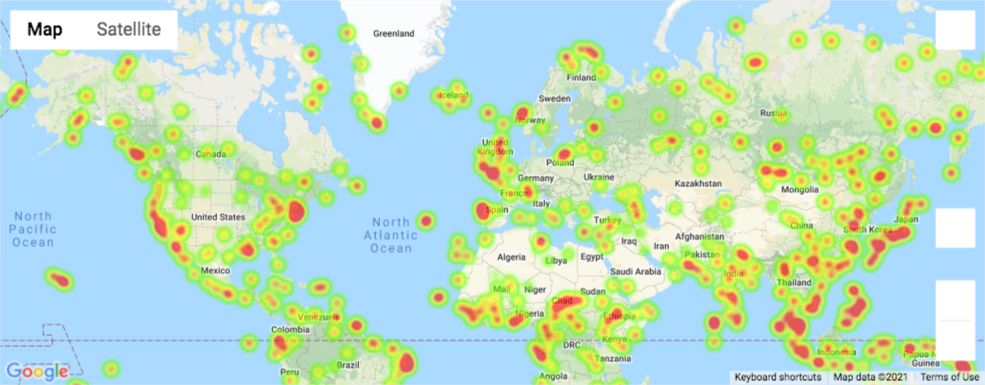

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [5]:
# Criteria:
# A max temperature lower than 80 degrees but higher than 70.
# Wind speed less than 10 mph.
# Zero cloudiness.
# Also drop any rows will null values
ideal_df = df[(df['Max Temp'] < 80) & (df['Max Temp'] > 70) & (df['Wind Speed'] < 10) & (df['Cloudiness'] == 0)]
ideal_df = ideal_df.dropna()
ideal_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
67,Grand Gaube,-20.0064,57.6608,72.00,59,0,8.99,MU,1627235603
98,Cap Malheureux,-19.9842,57.6142,72.09,59,0,8.99,MU,1627235609
101,Palembang,-2.9167,104.7458,73.11,91,0,4.50,ID,1627235610
118,Sampit,-2.5333,112.9500,71.38,96,0,2.24,ID,1627235614
331,Almaty,43.2500,76.9500,76.91,36,0,4.47,KZ,1627235469
360,Esmeraldas,-19.7625,-44.3139,77.11,21,0,7.40,BR,1627235666
389,Boralday,43.3578,76.8594,78.66,36,0,4.47,KZ,1627235672
515,Shingū,33.7333,135.9833,75.90,80,0,5.08,JP,1627235494


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [6]:
hotel_df = ideal_df.loc[:,['City','Country','Lat','Lng']]
hotel_df['Hotel Name'] = ''
hotel_df.reset_index(drop = True,inplace = True)
hotel_df

,City,Country,Lat,Lng,Hotel Name
0,Grand Gaube,MU,-20.0064,57.6608,
1,Cap Malheureux,MU,-19.9842,57.6142,
2,Palembang,ID,-2.9167,104.7458,
3,Sampit,ID,-2.5333,112.9500,
4,Almaty,KZ,43.2500,76.9500,
5,Esmeraldas,BR,-19.7625,-44.3139,
6,Boralday,KZ,43.3578,76.8594,
7,Shingū,JP,33.7333,135.9833,


In [7]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
params = {"type" : "hotel",
          "keyword" : "hotel",
          "radius" : 5000,
          "key" : g_key}

In [8]:
for index,row in hotel_df.iterrows():
    params["location"] = f"{row['Lat']},{row['Lng']}"
    print(f"Retrieving Results for Index {index}: {row['City']}.")
    response = requests.get(base_url,params).json()
    results = response['results']
    try:
        hotel_df.loc[index,'Hotel Name'] = results[0]['name']
        print(f"Closest hotel in {row['City']} is {results[0]['name']}.")
    except (KeyError,IndexError):
        print("No hotels found.")
        print("-------------------------")
        time.sleep(1)
print("--------------------Search End--------------------")

Retrieving Results for Index 0: Grand Gaube.
Closest hotel in Grand Gaube is LUX Grand Gaube Resort & Villas.
Retrieving Results for Index 1: Cap Malheureux.
Closest hotel in Cap Malheureux is LUX Grand Gaube Resort & Villas.
Retrieving Results for Index 2: Palembang.
Closest hotel in Palembang is Novotel Palembang - Hotel & Residence.
Retrieving Results for Index 3: Sampit.
Closest hotel in Sampit is Aquarius Boutique Hotel Sampit.
Retrieving Results for Index 4: Almaty.
Closest hotel in Almaty is The Ritz-Carlton, Almaty.
Retrieving Results for Index 5: Esmeraldas.
Closest hotel in Esmeraldas is Parque do Avestruz Hotel Fazenda.
Retrieving Results for Index 6: Boralday.
Closest hotel in Boralday is Saraichik Hotel.
Retrieving Results for Index 7: Shingū.
Closest hotel in Shingū is くまの蔵inn.
--------------------Search End--------------------


In [9]:
hotel_df

,City,Country,Lat,Lng,Hotel Name
0,Grand Gaube,MU,-20.0064,57.6608,LUX Grand Gaube Resort & Villas
1,Cap Malheureux,MU,-19.9842,57.6142,LUX Grand Gaube Resort & Villas
2,Palembang,ID,-2.9167,104.7458,Novotel Palembang - Hotel & Residence
3,Sampit,ID,-2.5333,112.9500,Aquarius Boutique Hotel Sampit
4,Almaty,KZ,43.2500,76.9500,"The Ritz-Carlton, Almaty"
5,Esmeraldas,BR,-19.7625,-44.3139,Parque do Avestruz Hotel Fazenda
6,Boralday,KZ,43.3578,76.8594,Saraichik Hotel
7,Shingū,JP,33.7333,135.9833,くまの蔵inn


In [10]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [12]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations,
                            info_box_content=hotel_info)
fig.add_layer(markers)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

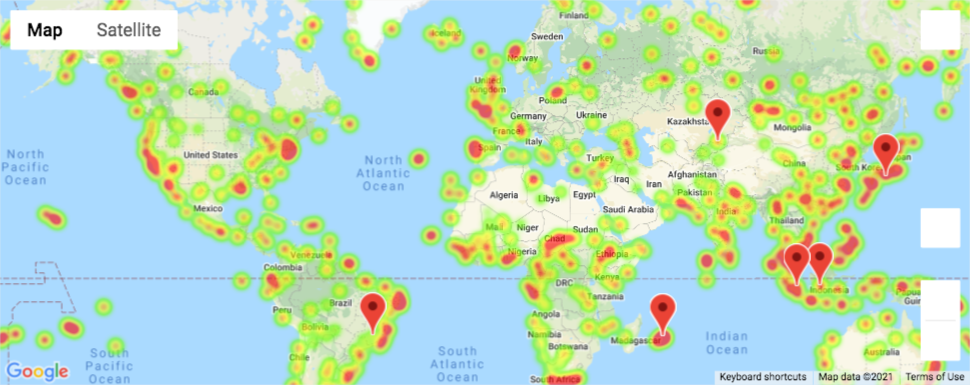